In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### ***2.*** Agora sua missão é continuar trabalhando no nosso dataset house price.

**a)** Crie uma função usando regressão linear para prever os preços das casas. <br>
**b)** Entenda os coeficientes. Quais variáveis são mais importantes para a previsão?

In [208]:
df_houses = pd.read_csv('../data/house_price.csv').drop('Unnamed: 0', axis=1)
df_houses.head()

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


##### *EDA*

shape: (1460, 11)


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
SalePrice,int64,0,0.0,663,"[208500, 181500, 223500]"
OverallQual,int64,0,0.0,10,"[7, 6, 8]"
OverallCond,int64,0,0.0,9,"[5, 8, 6]"
BedroomAbvGr,int64,0,0.0,8,"[3, 4, 1]"
TotRmsAbvGrd,int64,0,0.0,12,"[8, 6, 7]"
GrLivArea,int64,0,0.0,861,"[1710, 1262, 1786]"
TotalBsmtSF,int64,0,0.0,721,"[856, 1262, 920]"
YearBuilt,int64,0,0.0,112,"[2003, 1976, 2001]"
MSZoning,object,0,0.0,5,"[RL, RM, C (all)]"
Utilities,object,0,0.0,2,"[AllPub, NoSeWa]"


,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


<Axes: >

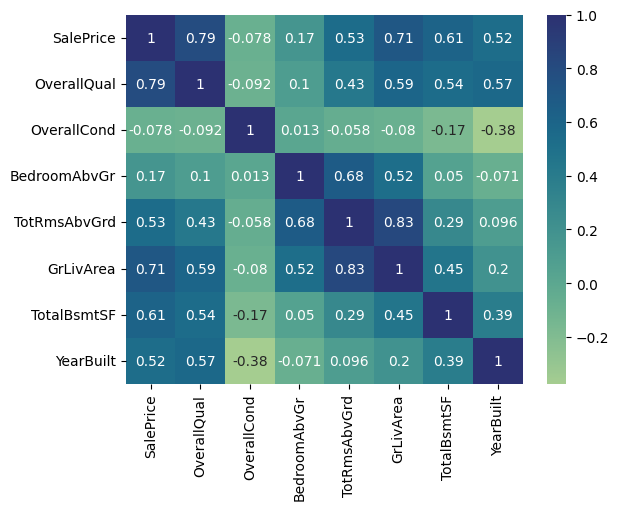

In [209]:

print('shape:', df_houses.shape)
display(
    pd.DataFrame({
        'Tipo': df_houses.dtypes,
        'Qtde nulos': df_houses.isnull().sum(),
        'Proporção nulos': df_houses.isnull().mean(),
        'Qtde unicos': df_houses.nunique(),
        'Exemplo unicos': df_houses.apply(lambda x: x.unique()[:3])
    })
)
display(df_houses.describe())
sns.heatmap(df_houses[['SalePrice','OverallQual','OverallCond','BedroomAbvGr','TotRmsAbvGrd','GrLivArea','TotalBsmtSF','YearBuilt']].corr(), cmap='crest', annot=True)

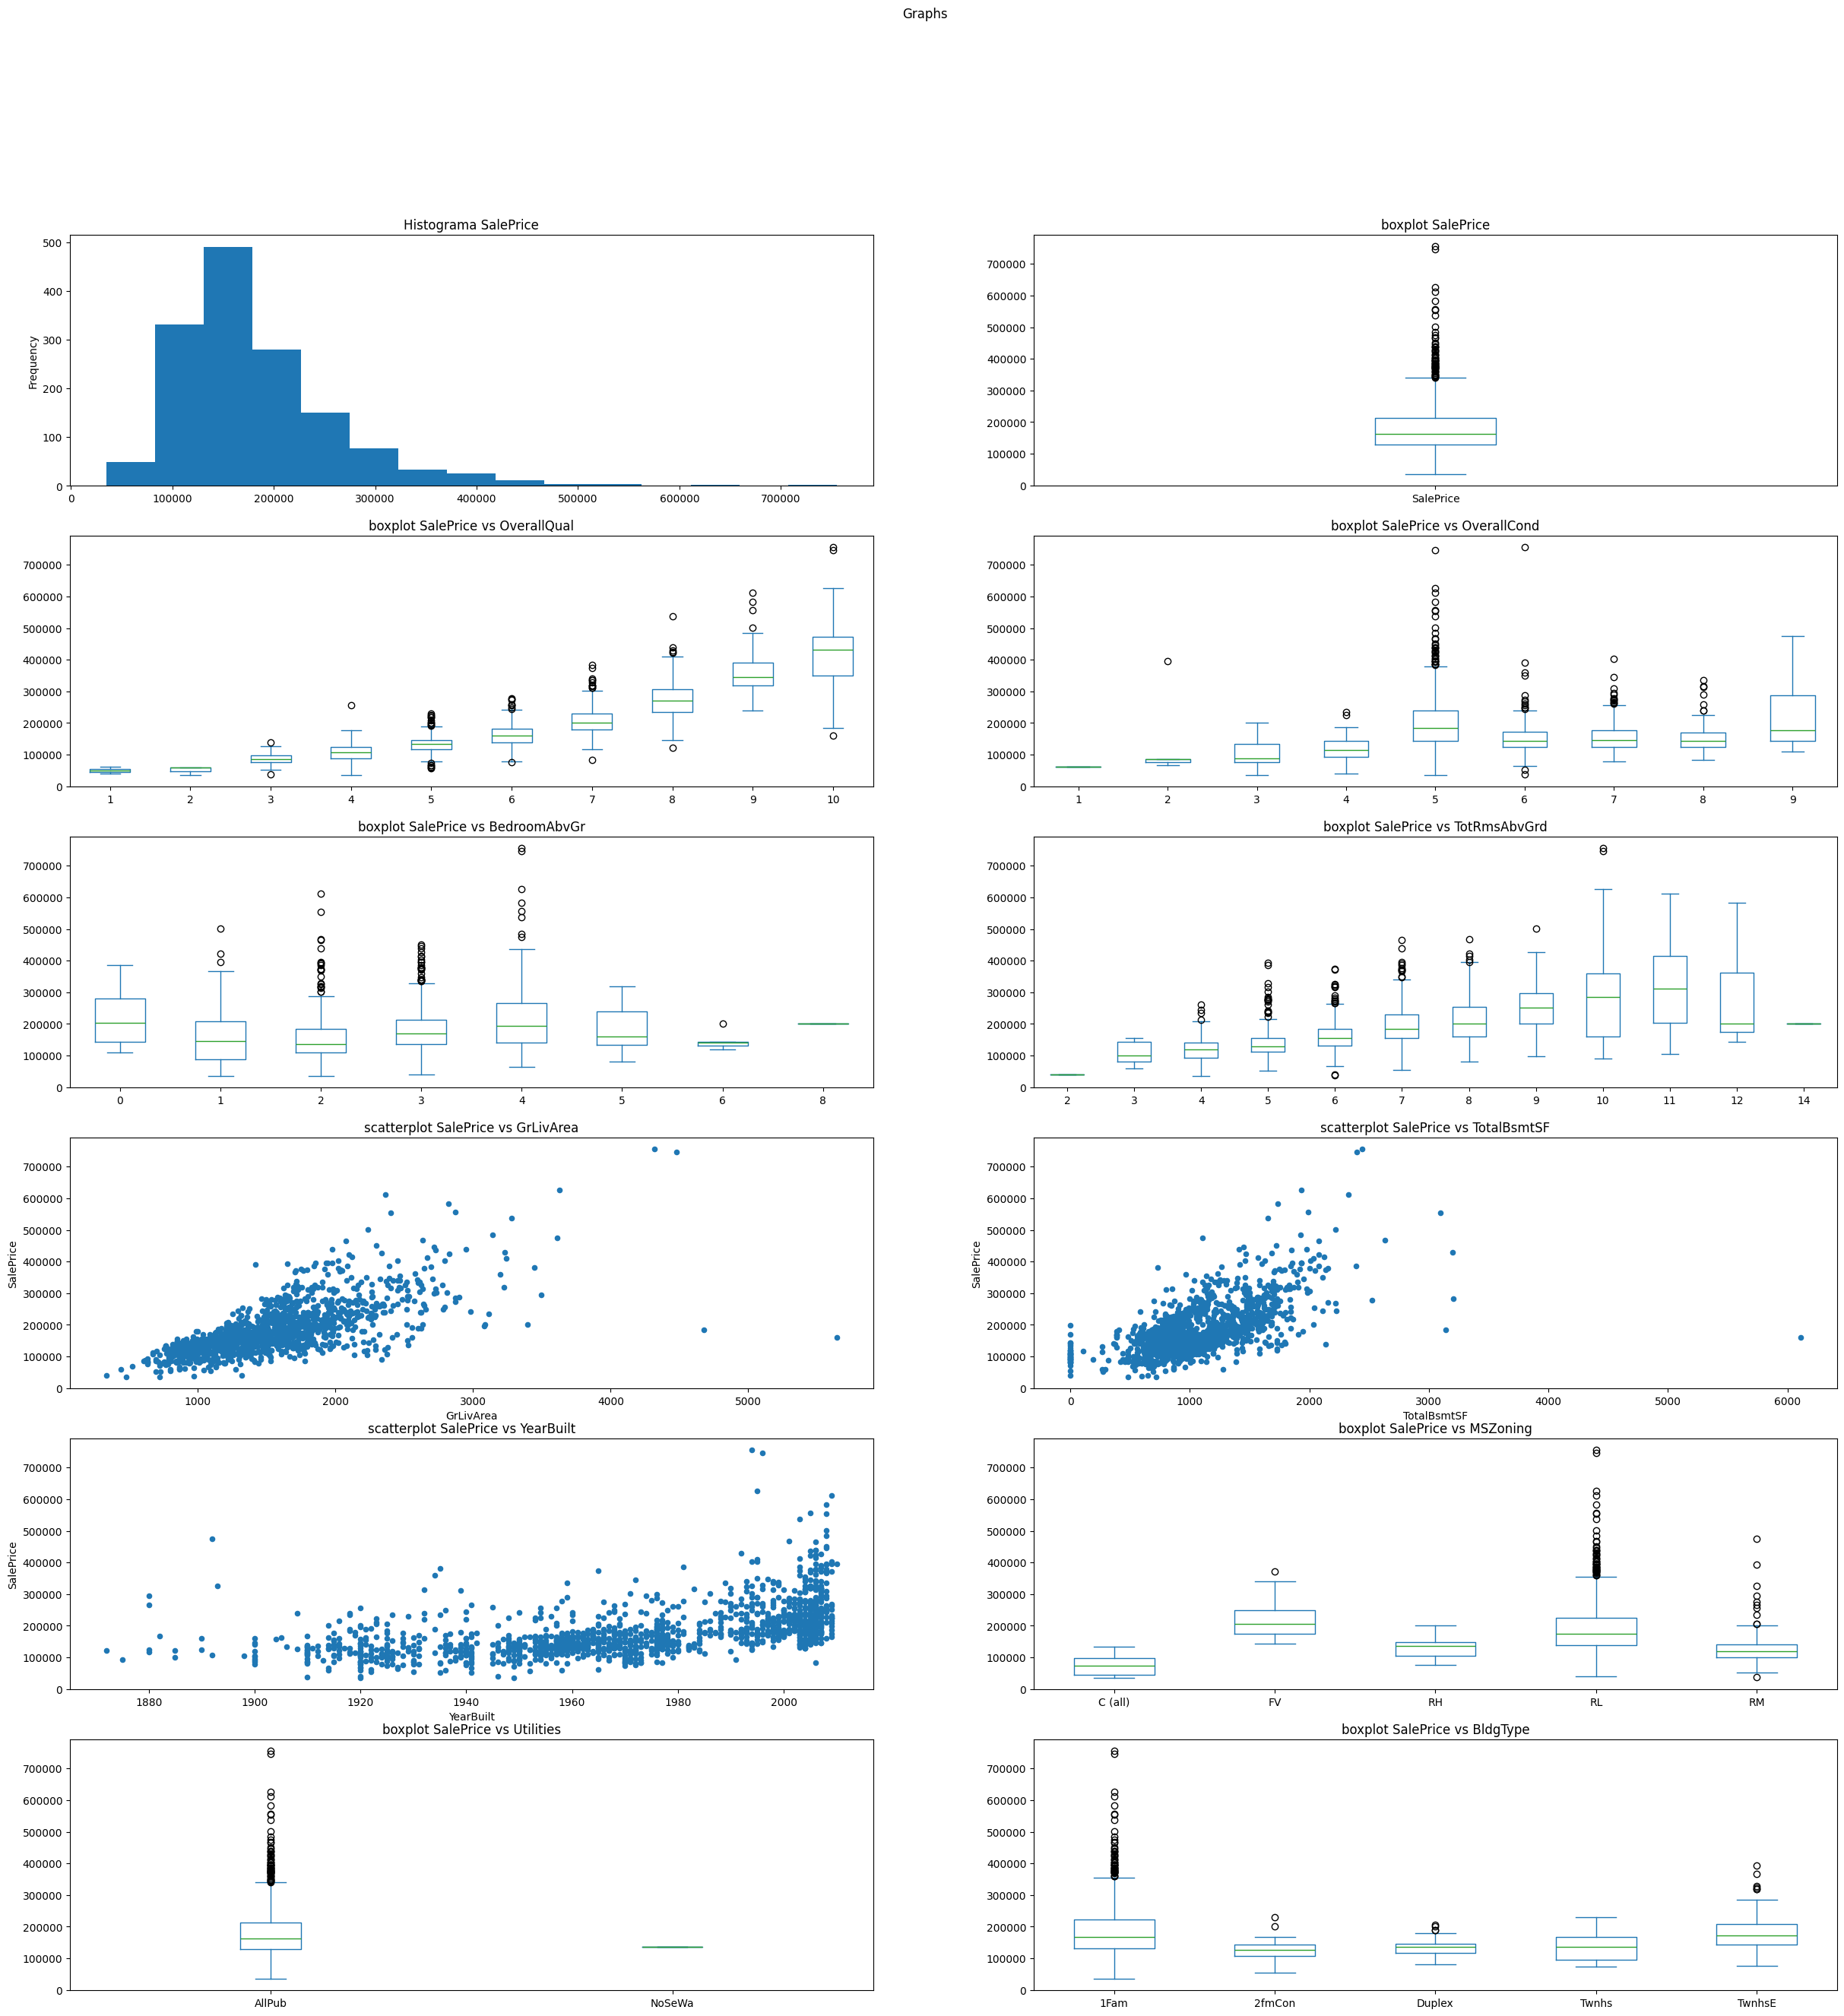

In [210]:

plt.close('all')
fig, axs = plt.subplots(6, 2, figsize=(30, 30))

df_houses['SalePrice'].plot.hist(ax=axs[0][0], bins=15)
axs[0][0].set_title('Histograma SalePrice')

df_houses['SalePrice'].plot.box(ax=axs[0][1])
axs[0][1].set_title('boxplot SalePrice')

df_houses[['SalePrice','OverallQual']].plot.box(ax=axs[1][0], by='OverallQual')
axs[1][0].set_title('boxplot SalePrice vs OverallQual')

df_houses[['SalePrice','OverallCond']].plot.box(ax=axs[1][1], by='OverallCond')
axs[1][1].set_title('boxplot SalePrice vs OverallCond')

df_houses[['SalePrice','BedroomAbvGr']].plot.box(ax=axs[2][0], by='BedroomAbvGr')
axs[2][0].set_title('boxplot SalePrice vs BedroomAbvGr')

df_houses[['SalePrice','TotRmsAbvGrd']].plot.box(ax=axs[2][1], by='TotRmsAbvGrd')
axs[2][1].set_title('boxplot SalePrice vs TotRmsAbvGrd')

df_houses[['SalePrice','GrLivArea']].plot.scatter(ax=axs[3][0], x='GrLivArea', y='SalePrice')
axs[3][0].set_title('scatterplot SalePrice vs GrLivArea')

df_houses[['SalePrice','TotalBsmtSF']].plot.scatter(ax=axs[3][1], x='TotalBsmtSF', y='SalePrice')
axs[3][1].set_title('scatterplot SalePrice vs TotalBsmtSF')

df_houses[['SalePrice','YearBuilt']].plot.scatter(ax=axs[4][0], x='YearBuilt', y='SalePrice')
axs[4][0].set_title('scatterplot SalePrice vs YearBuilt')

df_houses[['SalePrice','MSZoning']].plot.box(ax=axs[4][1], by='MSZoning')
axs[4][1].set_title('boxplot SalePrice vs MSZoning')

df_houses[['SalePrice','Utilities']].plot.box(ax=axs[5][0], by='Utilities')
axs[5][0].set_title('boxplot SalePrice vs Utilities')

df_houses[['SalePrice','BldgType']].plot.box(ax=axs[5][1], by='BldgType')
axs[5][1].set_title('boxplot SalePrice vs BldgType')

fig.suptitle('Graphs')
plt.show()

In [211]:
# coluna Utilities possui apenas uma casa com o valor da feature=NoSeWa (0.068% dos dados da coluna Utilies), logo não sera informativa para o modelo.
df_houses = df_houses.drop('Utilities', axis=1)

In [212]:
# Anova 2 way para ver se existe interação entre MSZoning e BldgType.
print('MSZoning x BldgType')

display(df_houses.groupby(['MSZoning'])['SalePrice'].describe().sort_values(by='mean'))
display(df_houses.groupby(['BldgType'])['SalePrice'].describe().sort_values(by='mean'))
display(df_houses.groupby(['MSZoning', 'BldgType'])['SalePrice'].describe())

## não tem dados suficientes em algumas interação, despeitando a premissa de que precisamos no minimo 30 dados em cada interação ou dados seguindo uma normal.

MSZoning x BldgType


,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),10.0,74528.000000,33791.092031,34900.0,43998.25,74700.0,98332.0,133900.0
RM,218.0,126316.830275,48521.689833,37900.0,100000.00,120500.0,140000.0,475000.0
RH,16.0,131558.375000,35714.118435,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1151.0,191004.994787,80766.341319,39300.0,137700.00,174000.0,224700.0,755000.0
FV,65.0,214014.061538,52369.662067,144152.0,174000.00,205950.0,250000.0,370878.0


,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0
1Fam,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0


count           mean           std       min       25%  \
MSZoning BldgType                                                            
C (all)  1Fam         9.0   67931.111111  28195.381348   34900.0   40000.0   
         2fmCon       1.0  133900.000000           NaN  133900.0  133900.0   
FV       1Fam        38.0  240940.236842  45720.302150  176000.0  208725.0   
         Twnhs        9.0  167533.333333  11301.880375  147400.0  160000.0   
         TwnhsE      18.0  180410.277778  41896.128202  144152.0  154375.0   
RH       1Fam         9.0  110770.444444  29127.624547   76000.0   82000.0   
         2fmCon       2.0  180000.000000  28284.271247  160000.0  170000.0   
         Duplex       3.0  144666.666667    577.350269  144000.0  144500.0   
         TwnhsE       2.0  157000.000000  33941.125497  133000.0  145000.0   
RL       1Fam      1025.0  193592.266341  82924.750516   39300.0  139000.0   
         2fmCon      16.0  134662.500000  34496.282408   80000.0  115375.0   
         Duplex      43.0  132379.906977  27847.684089   82000.0  118250.0   
         Twnhs       10.0  178850.000000  30285.722709  146000.0  149875.0   
         TwnhsE      57.0  206653.333333  56786.124540   99500.0  171750.0   
RM       1Fam       139.0  125436.899281  49249.734971   37900.0  103500.0   
         2fmCon      12.0  111075.000000  29363.927314   55000.0   92250.0   
         Duplex       6.0  136300.000000  35952.190476  110000.0  115125.0   
         Twnhs       24.0  106162.500000  23492.807641   75000.0   87500.0   
         TwnhsE      37.0  146020.000000  57716.599961   75500.0  124000.0   

                        50%       75%       max  
MSZoning BldgType                                
C (all)  1Fam       68400.0   85000.0  108000.0  
         2fmCon    133900.0  133900.0  133900.0  
FV       1Fam      235800.0  260600.0  370878.0  
         Twnhs     172500.0  177000.0  179400.0  
         TwnhsE    172200.0  192975.0  328900.0  
RH       1Fam      107000.0  130000.0  159434.0  
         2fmCon    180000.0  190000.0  200000.0  
         Duplex    145000.0  145000.0  145000.0  
         TwnhsE    157000.0  169000.0  181000.0  
RL       1Fam      175000.0  227000.0  755000.0  
         2fmCon    130250.0  148000.0  228950.0  
         Duplex    135960.0  144500.0  200000.0  
         Twnhs     174250.0  204625.0  230000.0  
         TwnhsE    194201.0  245500.0  367294.0  
RM       1Fam      119500.0  136750.0  475000.0  
         2fmCon    116450.0  126125.0  163000.0  
         Duplex    124750.0  136250.0  206300.0  
         Twnhs      98500.0  118375.0  164000.0  
         TwnhsE    140000.0  151400.0  392500.0

In [213]:
## onehot 
# padrão -> MSZoning_C (all)
# padrão -> BldgType_1Fam

df_houses = pd.concat([
    df_houses.drop(['MSZoning','BldgType'], axis=1),
    pd.get_dummies(df_houses[['MSZoning','BldgType']], drop_first=True, dtype=int)
], axis=1)

df_houses.sample()

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
864,250580,7,5,3,6,1372,1372,2007,1,0,0,0,0,0,0,0


In [214]:
### train-test split
print(df_houses.shape[0])

df_houses = df_houses.reset_index()

df_houses_test = df_houses.sample(int(df_houses.shape[0]*.25))
df_houses = df_houses[~df_houses['index'].isin(df_houses_test['index'])].copy()

df_houses = df_houses.drop('index', axis=1)
df_houses_test = df_houses_test.drop('index', axis=1)


print(
    df_houses.shape[0]+df_houses_test.shape[0], 
    df_houses.shape[0]/(df_houses.shape[0]+df_houses_test.shape[0]), 
    df_houses_test.shape[0]/(df_houses.shape[0]+df_houses_test.shape[0])
    )

1460
1460 0.75 0.25


##### **a)** Crie uma função usando regressão linear para prever os preços das casas.

In [215]:
## treinar modelo para previsão
features = [col for col in df_houses.columns if 'SalePrice' not in col]

formula = f"SalePrice ~ {' + '.join(features)}"
model = smf.ols(formula=formula, data=df_houses)
res = model.fit()
res.summary()

# temos R2 (ajustado)=.783 e p-value=0; modelo relativamente bom (comparado a média) e estatisticamente melhor que a média. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     240.2
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:01:16   Log-Likelihood:                -13133.
No. Observations:                1095   AIC:                         2.630e+04
Df Residuals:                    1079   BIC:                         2.638e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.159e+06   1.17e+05     -9.934      0.000   -1.39e+06    -9.3e+05
OverallQual      1.996e+04   1447.487     13.787      0.000    1.71e+04    2.28e+04
OverallCond      5888.2053   1195.832      4.924      0.000    3541.786    8234.625
BedroomAbvGr    -1.569e+04   2137.737     -7.340      0.000   -1.99e+04   -1.15e+04
TotRmsAbvGrd     5904.3980   1548.369      3.813      0.000    2866.243    8942.553
GrLivArea          55.9829      4.720     11.860      0.000      46.721      65.245
TotalBsmtSF        23.7079      3.446      6.879      0.000      16.945      30.470
YearBuilt         543.6382     60.344      9.009      0.000     425.234     662.042
MSZoning_FV      1.246e+04   1.57e+04      0.794      0.427   -1.83e+04    4.32e+04
MSZoning_RH      8709.8741   1.86e+04      0.469      0.639   -2.77e+04    4.52e+04
MSZoning_RL      1.596e+04   1.44e+04      1.106      0.269   -1.24e+04    4.43e+04
MSZoning_RM      7445.0429   1.45e+04      0.512      0.609   -2.11e+04     3.6e+04
BldgType_2fmCon    37.5963   8267.282      0.005      0.996   -1.62e+04    1.63e+04
BldgType_Duplex -2.145e+04   7233.132     -2.966      0.003   -3.56e+04   -7261.502
BldgType_Twnhs  -3.305e+04   7035.202     -4.698      0.000   -4.69e+04   -1.92e+04
BldgType_TwnhsE -1.881e+04   5070.759     -3.710      0.000   -2.88e+04   -8860.919
==============================================================================
Omnibus:                      466.816   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64268.251
Skew:                          -0.894   Prob(JB):                         0.00
Kurtosis:                      40.489   Cond. No.                     2.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **b)** Entenda os coeficientes. Quais variáveis são mais importantes para a previsão?

In [216]:
df = df_houses.copy()

features = [col for col in df.columns if 'SalePrice' not in col]

# homocedasticidade violada (Premissa 5), aplicar transformação log10 no target
df['log10_SalePrice'] = np.log10(df['SalePrice'])

# multicolinearidade violada (Premissa 6), aplicar centralização nas features continuas
features_continuas = [col for col in features if 'MSZoning' not in col and 'BldgType' not in col]
for feature in features_continuas:
    df[feature] = df[feature]-df[feature].mean()

# padronizar features a fim de colocar-las na mesma escala
for feature in features:
    df[feature] = (df[feature]-df[feature].mean())/df[feature].std()

formula = f"log10_SalePrice ~ {' + '.join(features)}"
model = smf.ols(formula=formula, data=df)
res2 = model.fit()

display(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log10_SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     363.6
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:01:16   Log-Likelihood:                 1344.8
No. Observations:                1095   AIC:                            -2658.
Df Residuals:                    1079   BIC:                            -2578.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2236      0.002   2421.550      0.000       5.219       5.228
OverallQual         0.0611      0.004     16.679      0.000       0.054       0.068
OverallCond         0.0266      0.002     11.121      0.000       0.022       0.031
BedroomAbvGr       -0.0140      0.003     -4.452      0.000      -0.020      -0.008
TotRmsAbvGrd        0.0180      0.005      3.908      0.000       0.009       0.027
GrLivArea           0.0554      0.005     12.093      0.000       0.046       0.064
TotalBsmtSF         0.0210      0.003      7.384      0.000       0.015       0.027
YearBuilt           0.0494      0.003     14.692      0.000       0.043       0.056
MSZoning_FV         0.0307      0.006      5.033      0.000       0.019       0.043
MSZoning_RH         0.0117      0.003      3.486      0.001       0.005       0.018
MSZoning_RL         0.0557      0.011      5.202      0.000       0.035       0.077
MSZoning_RM         0.0345      0.009      3.692      0.000       0.016       0.053
BldgType_2fmCon     0.0007      0.002      0.326      0.745      -0.004       0.005
BldgType_Duplex    -0.0085      0.002     -3.727      0.000      -0.013      -0.004
BldgType_Twnhs     -0.0152      0.002     -6.420      0.000      -0.020      -0.011
BldgType_TwnhsE    -0.0052      0.003     -2.057      0.040      -0.010      -0.000
==============================================================================
Omnibus:                      889.820   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68429.565
Skew:                          -3.170   Prob(JB):                         0.00
Kurtosis:                      41.205   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Premissa 1: 
**LINEARIDADE**

In [217]:
# OK
# -> já que obtemos um bom R2 no primeiro modelo, então provalmente temos uma relação linear entre as features e o target, alem de ser visivel pelos graficos entre cada feature com o target.

###### Premissa 2:
**A MÉDIA DOS RESIDUOS TENDE A ZERO**

In [218]:
# OK
print('média dos residuos:', res2.resid.mean())

média dos residuos: -4.002075180639651e-15


###### Premissa 3:
**EXOGENEIDADE** - ausencia de correlação entre o residuo e as features

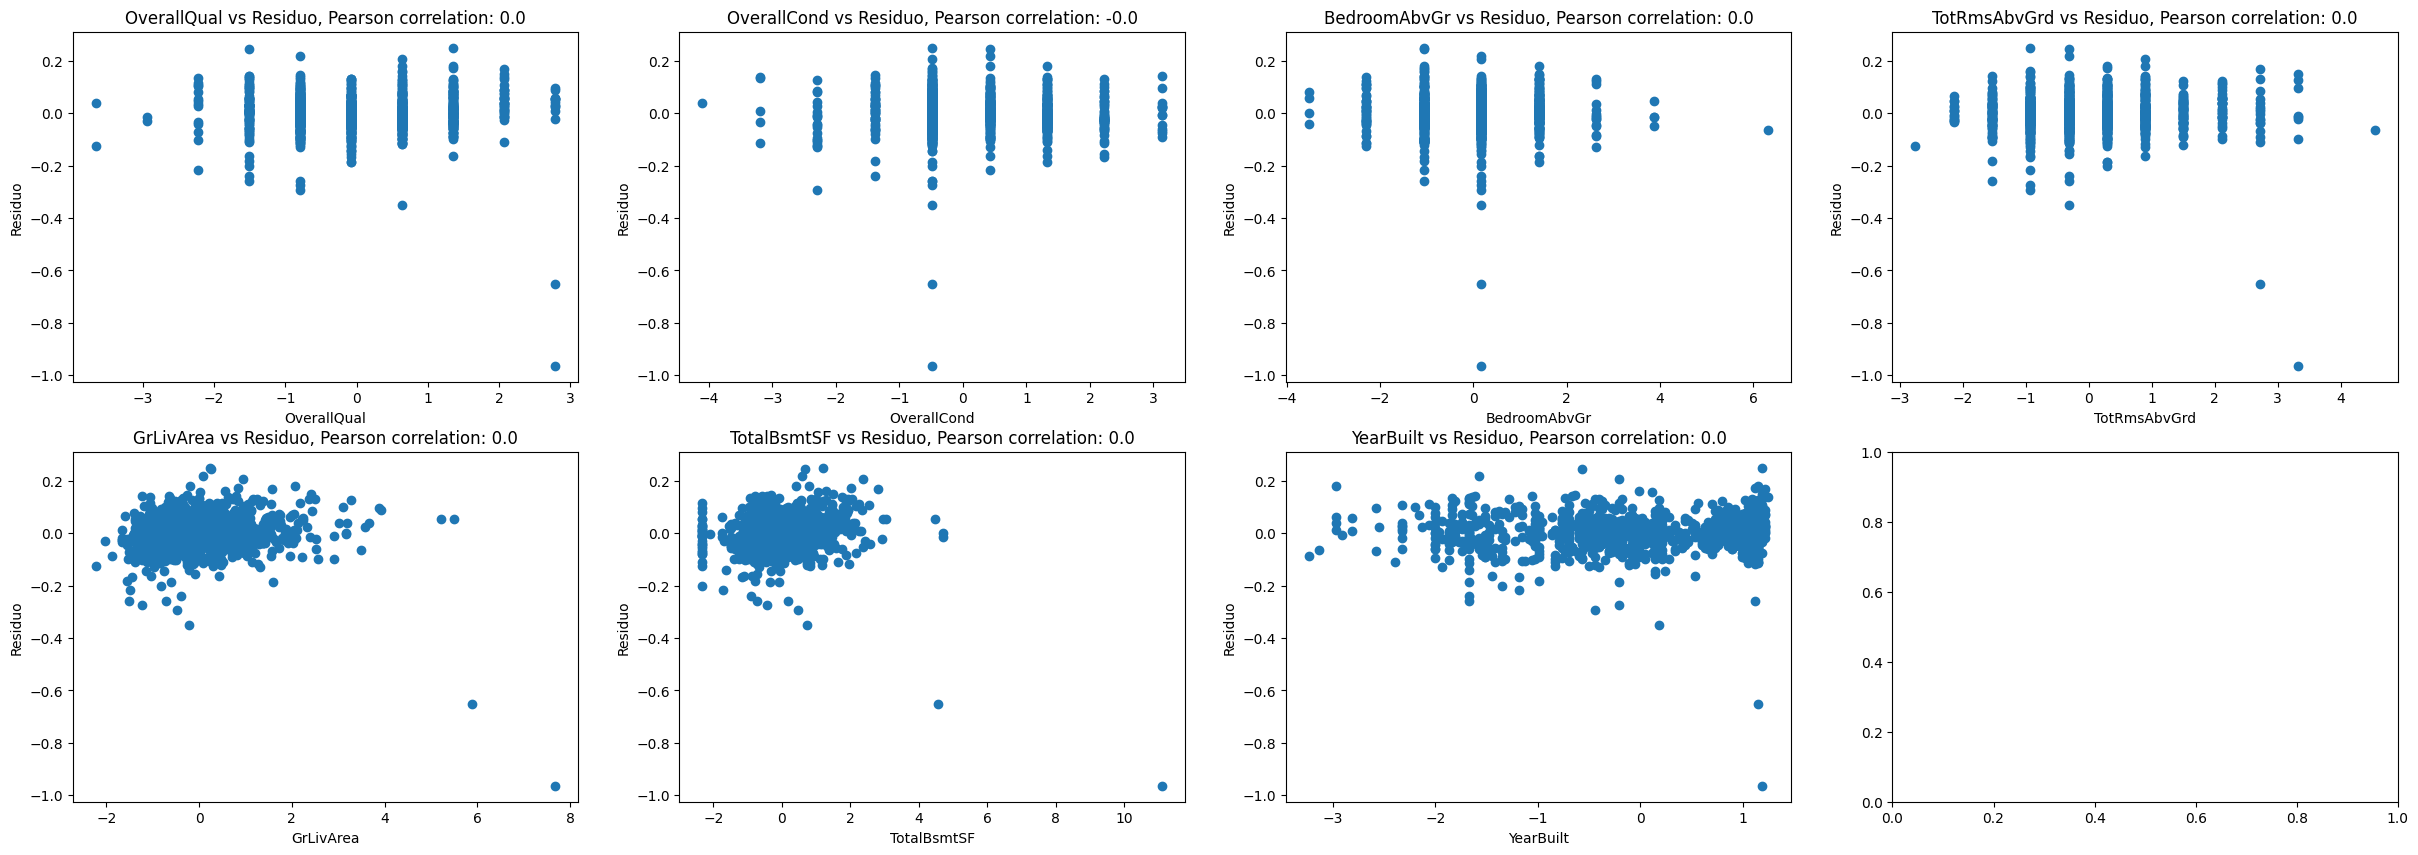

In [219]:
# OK
df['residuo'] = res2.resid

plt.close('all')
fig, axs = plt.subplots(2, 4, figsize=(30, 10))
for i, col in enumerate([col for col in df.columns if 'SalePrice' not in col and 'MSZoning' not in col and 'BldgType' not in col and 'residuo' not in col]):
    idy = i//4
    idx = i%4
    
    corr = round(df[[col, 'residuo']].corr()['residuo'].values[0], 3)

    axs[idy][idx].scatter(x=df[col], y=df['residuo'])
    axs[idy][idx].set_title(f'{col} vs Residuo, Pearson correlation: {corr}')
    axs[idy][idx].set_xlabel(col)
    axs[idy][idx].set_ylabel('Residuo')
plt.show()

###### Premissa 4:
**AUSENCIA DE AUTOCORRELAÇÃO ENTRE RESIDUOS**

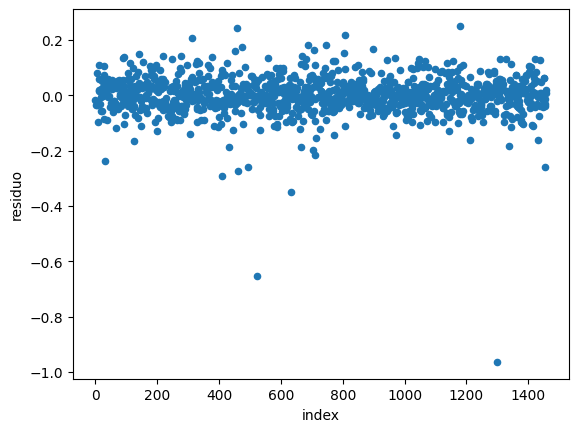

In [220]:
# OK
df[['residuo']].reset_index().plot.scatter(x='index', y='residuo');

###### Premissa 5:
**HOMOCEDASTICIDADE** - ausencia de constancia na variação dos residuos na direção do target previsto

<Axes: >

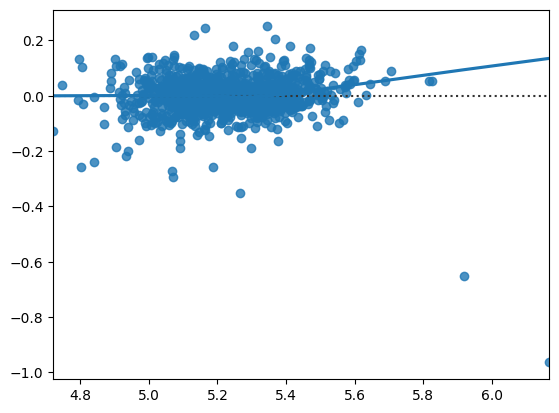

In [221]:
# tratamento feito, transformação log10 no target
# OK

sns.residplot(x=res2.fittedvalues, y=res2.resid, lowess=True)

###### Premissa 6:
**AUSENCIA DE MULTICOLINEARIDADE**

,Feature,VIF
0,OverallQual,2.662251
1,OverallCond,1.194603
2,BedroomAbvGr,1.985479
3,TotRmsAbvGrd,4.319516
4,GrLivArea,4.448313
5,TotalBsmtSF,1.612377
6,YearBuilt,1.879183


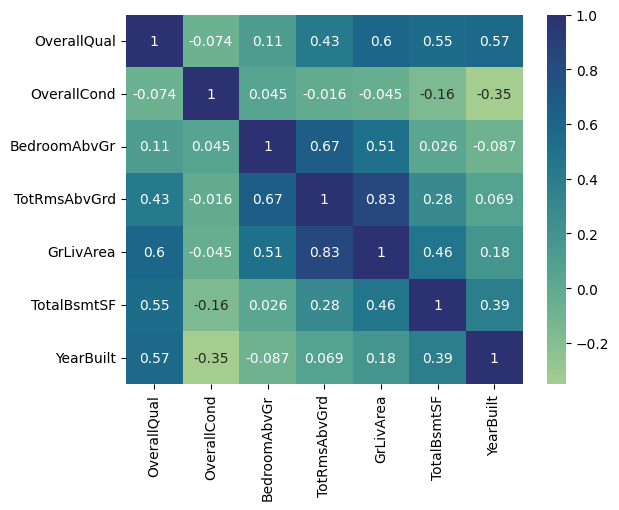

In [222]:
# OK
# tratamento feito, centralização nas features continuas 
features_continuas = [col for col in features if 'MSZoning' not in col and 'BldgType' not in col]

display(
    pd.DataFrame({
        'Feature': df[features_continuas].columns,
        'VIF': [variance_inflation_factor(df[features_continuas].values, i_col) for i_col in range(len(df[features_continuas].columns))]
    })
)

sns.heatmap(df[features_continuas].corr(), cmap='crest', annot=True);

###### Insights:
**INFERENCIA SOBRE OS COEFICIENTES**

In [223]:
display(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log10_SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     363.6
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:01:18   Log-Likelihood:                 1344.8
No. Observations:                1095   AIC:                            -2658.
Df Residuals:                    1079   BIC:                            -2578.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2236      0.002   2421.550      0.000       5.219       5.228
OverallQual         0.0611      0.004     16.679      0.000       0.054       0.068
OverallCond         0.0266      0.002     11.121      0.000       0.022       0.031
BedroomAbvGr       -0.0140      0.003     -4.452      0.000      -0.020      -0.008
TotRmsAbvGrd        0.0180      0.005      3.908      0.000       0.009       0.027
GrLivArea           0.0554      0.005     12.093      0.000       0.046       0.064
TotalBsmtSF         0.0210      0.003      7.384      0.000       0.015       0.027
YearBuilt           0.0494      0.003     14.692      0.000       0.043       0.056
MSZoning_FV         0.0307      0.006      5.033      0.000       0.019       0.043
MSZoning_RH         0.0117      0.003      3.486      0.001       0.005       0.018
MSZoning_RL         0.0557      0.011      5.202      0.000       0.035       0.077
MSZoning_RM         0.0345      0.009      3.692      0.000       0.016       0.053
BldgType_2fmCon     0.0007      0.002      0.326      0.745      -0.004       0.005
BldgType_Duplex    -0.0085      0.002     -3.727      0.000      -0.013      -0.004
BldgType_Twnhs     -0.0152      0.002     -6.420      0.000      -0.020      -0.011
BldgType_TwnhsE    -0.0052      0.003     -2.057      0.040      -0.010      -0.000
==============================================================================
Omnibus:                      889.820   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68429.565
Skew:                          -3.170   Prob(JB):                         0.00
Kurtosis:                      41.205   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
print('insights')
print('1. coeficientes que não impactam significalvelmente o target: BldgType_2fmCon (categorica)')
print('2. todos os outros coeficientes impactam significalvelmente o target')
print('3. top3 coeficientes (>= 0.0574) que mais impactam positivamente o target: MSZoning_RL, GrLivArea, OverallQual')
print('4. top2 coeficientes (<= -0.0126) que mais impactam negativamente o target: BldgType_Twnhs (categorica), BedroomAbvGr')

insights
1. coeficientes que não impactam significalvelmente o target: BldgType_2fmCon (categorica)
2. todos os outros coeficientes impactam significalvelmente o target
3. top3 coeficientes (>= 0.0574) que mais impactam positivamente o target: MSZoning_RL, GrLivArea, OverallQual
4. top2 coeficientes (<= -0.0126) que mais impactam negativamente o target: BldgType_Twnhs (categorica), BedroomAbvGr


##### **c)** Predissão do modelo **a)** versus modelo **b)**

In [225]:
df_houses_test['SalePrice_hat'] = res.get_prediction(df_houses_test.drop('SalePrice', axis=1)).predicted
df_houses_test['squared_SalePrice-SalePrice_hat'] = (df_houses_test['SalePrice']-df_houses_test['SalePrice_hat'])**2

RMSE_modeloA = (df_houses_test['squared_SalePrice-SalePrice_hat'].sum()/df_houses_test.shape[0])**(1/2)

df_houses_test = df_houses_test.drop(['SalePrice_hat','squared_SalePrice-SalePrice_hat'], axis=1)

## aplicar as mesmas transformações aplicadas para treinamento do modelo b)
# centralização nas features continuas
features_continuas = [col for col in features if 'MSZoning' not in col and 'BldgType' not in col]
for feature in features_continuas:
    df_houses_test[feature] = df_houses_test[feature]-df_houses_test[feature].mean()

# padronizar features a fim de colocar-las na mesma escala
for feature in features:
    df_houses_test[feature] = (df_houses_test[feature]-df_houses_test[feature].mean())/df_houses_test[feature].std()

df_houses_test['SalePrice_hat'] = 10**res2.get_prediction(df_houses_test.drop('SalePrice', axis=1)).predicted # aplicado volta do log10 (y = 10**log10(y))
df_houses_test['squared_SalePrice-SalePrice_hat'] = (df_houses_test['SalePrice']-df_houses_test['SalePrice_hat'])**2

RMSE_modeloB = (df_houses_test['squared_SalePrice-SalePrice_hat'].sum()/df_houses_test.shape[0])**(1/2)

print('RMSE modelo A:', RMSE_modeloA, '\nRMSE modelo B:', RMSE_modeloB)
# diferenças "sutis" nos RMSE, provavelmente tem o mesmo resultado resultado estatisticamente falando.

RMSE modelo A: 28973.41418180477 
RMSE modelo B: 25325.108349751787
